In [1]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np;
from scipy.stats import chi2_contingency;

In [4]:
df = pd.read_csv('student_depression_dataset.csv');

In [5]:
df.head(5)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
df.shape

(27901, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [10]:
df[df["Depression"] == 1].shape[0]

16336

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.head(5)

,id,gender,age,city,profession,academic pressure,work pressure,cgpa,study satisfaction,job satisfaction,sleep duration,dietary habits,degree,have you ever had suicidal thoughts ?,work/study hours,financial stress,family history of mental illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Prevalência Geral de Depressão na Amostra

Inicialmente, calculamos a prevalência geral de depressão em toda a amostra. Utilizando uma função para calcular a porcentagem, constatamos que aproximadamente **58.55%** dos participantes da amostra foram diagnosticados com depressão. Este número representa a proporção geral da condição em nosso conjunto de dados antes de explorarmos as associações com outras variáveis, como o gênero, profissão, horas de sono, dentre outras.

In [15]:
def cal_porcentagem(x, y):
    percent = (x / y) * 100
    return(f"{percent:.2f}")

In [16]:
cal_porcentagem(df[df["depression"] == 1].shape[0], df.shape[0])

'58.55'

### Relação entre Gênero e Depressão

Nesta seção, investigaremos a relação entre o gênero dos participantes e a ocorrência de depressão. Inicialmente, é importante notar que a amostra analisada possui uma maioria de participantes do sexo masculino (15.547 homens e 12.354 mulheres). Essa distribuição desigual deve ser levada em consideração ao interpretar os resultados desta análise.

A tabela de contingência abaixo mostra a contagem de participantes para cada combinação de gênero (Masculino e Feminino) e status de depressão (0 = Não diagnosticado com depressão, 1 = Diagnosticado com depressão), em seguida, uma tabela com as respectivas porcentagens.

Em seguida, para visualizar essa relação de forma mais clara e comparar as contagens de depressão entre os gêneros, utilizaremos um gráfico de barras agrupadas. Este gráfico exibirá, para cada gênero, duas barras lado a lado: uma representando o número de participantes sem depressão e outra representando o número de participantes com depressão.

**Consideração sobre a Amostra:** A diferença na prevalência de depressão entre os gêneros nesta amostra parece ser pequena (aproximadamente 0.18 pontos percentuais), o que pode ser influenciado pelo desbalanceamento da amostra.

In [13]:
tabela_genero_depressao = pd.crosstab(df['gender'], df['depression'], margins=True, margins_name="Total")

total_por_genero = df['gender'].value_counts()

depressao_por_genero = df[df["depression"] == 1]["gender"].value_counts()

df_percentual = pd.DataFrame({
    'Gender': depressao_por_genero.index,
    'Percentual': (depressao_por_genero / total_por_genero * 100).round(2)
})


print("\nDivisão de Gênero com e sem Depressão\n")
print(tabela_genero_depressao)
print("\n----------------------------------\n")
print("Quantos % de cada gênero tem depressão?\n")
print(df_percentual)


Divisão de Gênero com e sem Depressão

depression      0      1  Total
gender                         
Female       5133   7221  12354
Male         6432   9115  15547
Total       11565  16336  27901

----------------------------------

Quantos % de cada gênero tem depressão?

        Gender  Percentual
gender                    
Male      Male       58.63
Female  Female       58.45


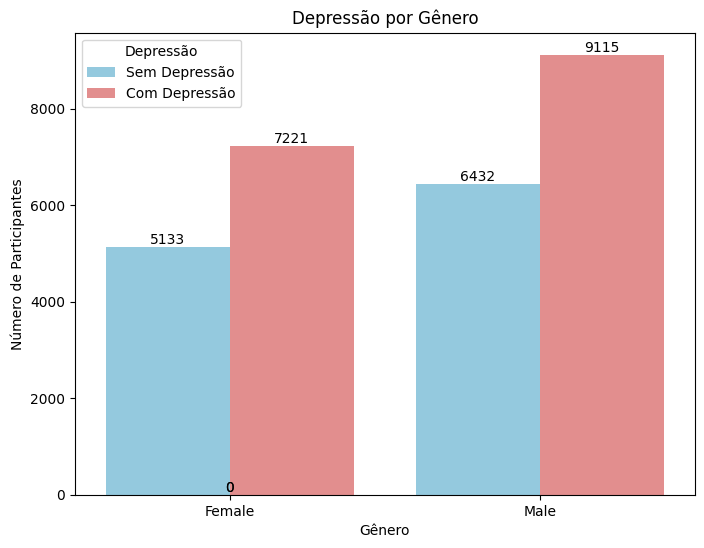

In [14]:
tabela_genero_depressao = pd.crosstab(df['gender'], df['depression'])

df_long = tabela_genero_depressao.reset_index().melt(
    id_vars='gender',
    value_vars=[0, 1],
    var_name='depression',
    value_name='Count'
)

df_long['depression'] = df_long['depression'].map({0: 'Sem Depressão', 1: 'Com Depressão'})

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='gender', y='Count', hue='depression', data=df_long, palette={'Sem Depressão': 'skyblue', 'Com Depressão': 'lightcoral'})

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height + 3
    ax.text(x, y, f'{int(height)}', ha='center', va='bottom')

plt.title('Depressão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Participantes')
plt.legend(title='Depressão')
plt.show()